# KNN From Sratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [33]:
#import libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import mode
from sklearn.model_selection import train_test_split

### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

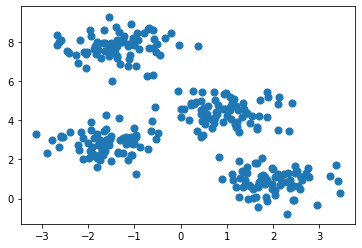

In [34]:
#make the dataset with make_blobs
#your code here

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 2: Create the helper functions
1. Implement ```square_diff``` that takes in two vectors ```x1``` and ```x2``` and returns their squared difference. Hint: Use ```assert``` to check their lenghts match.
2. Implement ```root_sum_squared``` that takes in a vector of squaerd differences and returns the square root of the summed elements.
3. Implement ```euclidean_distances``` that takes in feature and prediction vectors and computes the distances. *Hint:* ```np.linalg.norm```
4. Implement ```evaluate``` that takes in ```y_hat``` and ```y_true``` (classifications of the blobs)and returns the accruacy of the KNN predict function.

In [35]:
#implement square diff
# your code here

def square_diff(x1, x2):
    assert len(x1) == len(x2), 'x1 and x2 should be the same length'
    return np.sum((x1 - x2) ** 2)

In [36]:
#implement root sum squares
#your code here

def root_sum_squared(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [37]:
#implement the euclidean distances function
#your code here

def euclidean_distance(x1, x2):
    distance = np.linalg.norm(x1 - x2)
    return distance

In [38]:
#implement the evaluate function
#your code here
def evaluate(y_test, y_pred):
    from sklearn.metrics import accuracy_score
    return accuracy_score(y_test, y_pred)

### Step 3: Create the KNN prediction function
The KNN prediction function as the following steps
1. For each row in ```X``` calcuate the euclidian distance of each row to the target vector.
2. Combine the distances array with the target classifers array y.
3. Sort the array and select the k lowest pairs and get the categorical values of the k nearest and put in a list
4. Count the highest votes and update the highest voted class to y_hat

In [39]:
#implement the predict function
#your code here

def predict(X_train, y_train, X_test, k=3):
    y_pred = []
    for i in X_test:
        dist = []

        for j in range (len(X_train)):
            distance = euclidean_distance(X_train[j, :], i)
            dist.append(distance)
        
        dist = np.array(dist)
        sorted_dist = np.argsort(dist)[:k]

        labels = y_train[sorted_dist]
        label = mode(labels)
        label = label.mode[0]
        y_pred.append(label)
    
    return y_pred

In [40]:
predictions = predict(X_train, y_train, X_test, k=3)

In [41]:
print('Accuracy {:0.2f}%'.format(evaluate(predictions, y_test)))

Accuracy 1.00%


In [42]:
# implementing class

class KNN:
    def __init__(self, k):
        self.k = k
    
    def euclidean_distance(self, x1, x2):
        distance = np.linalg.norm(self.x1 - self.x2)
        return distance

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        return self
    
    def predict(self, X_train, y_train, X_test, k):
        y_pred = []
        for i in self.X_test:
            dist = []

            for j in range (len(self.X_train)):
                distance = euclidean_distance(X_train[j, :], i)
                dist.append(distance)
            
            dist = np.array(dist)
            sorted_dist = np.argsort(dist)[:self.k]

            labels = y_train[sorted_dist]
            label = mode(labels)
            label = label.mode[0]
            y_pred.append(label)
        
        return y_pred

    def score(self, Y_test, Y_pred):
        from sklearn.metrics import accuracy_score
        return accuracy_score(y_test, y_pred)